In [2]:
# Initialize OK
from client.api.notebook import Notebook
ok = Notebook('hw07.ok')

Assignment: Homework 7: Testing Hypotheses
OK, version v1.12.5



# Homework 7: Testing Hypotheses

**Reading**: 
* [Testing Hypotheses](https://www.inferentialthinking.com/chapters/11/testing-hypotheses.html)

Please complete this notebook by filling in the cells provided. Before you begin, execute the following cell to load the provided tests. Each time you start your server, you will need to execute this cell again to load the tests.

Homework 7 is due **Thursday, 3/14 at 11:59pm**. You will receive an early submission bonus point if you turn in your final submission by Wednesday, 3/13 at 11:59pm. Start early so that you can come to office hours if you're stuck. Check the website for the office hours schedule. Late work will not be accepted as per the [policies](http://data8.org/sp19/policies.html) of this course. 

Directly sharing answers is not okay, but discussing problems with the course staff or with other students is encouraged. Refer to the policies page to learn more about how to learn cooperatively.

For all problems that you must write our explanations and sentences for, you **must** provide your answer in the designated space. Moreover, throughout this homework and all future ones, please be sure to not re-assign variables throughout the notebook! For example, if you use `max_temperature` in your answer to one question, do not reassign it later on.

In [31]:
# Don't change this cell; just run it. 

import numpy as np
from datascience import *

# These lines do some fancy plotting magic.
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import warnings
warnings.simplefilter('ignore', FutureWarning)

from client.api.notebook import Notebook
ok = Notebook('hw07.ok')
_ = ok.auth(inline=True)

Assignment: Homework 7: Testing Hypotheses
OK, version v1.12.5

Successfully logged in as udaykrishna25@berkeley.edu


## 1. Catching Cheaters


Suppose you are a casino owner, and your casino runs a very simple game of chance.  The dealer flips a coin.  The customer wins $\$$9 from the casino if it comes up heads and loses $\$$10 if it comes up tails.

**Question 1.** Assuming no one is cheating and the coin is fair, if a customer plays twice, what is the chance they make money?

<!--
BEGIN QUESTION
name: q1_1
manual: false
-->

In [32]:
p_winning_after_two_flips = 0.25

In [33]:
ok.grade("q1_1");

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



A certain customer plays the game 20 times and wins 13 of the bets.  You suspect that the customer is cheating!  That is, you think that their chance of winning is higher than the normal chance of winning.

You decide to test your hunch using the outcomes of the 20 games you observed.

**Question 2.** Define the null hypothesis and alternative hypothesis for this investigation. 

<!--
BEGIN QUESTION
name: q1_2
manual: true
-->

<!-- EXPORT TO PDF -->
<!-- EXPORT TO PDF -->

The Null Hypothesis would be that the customer is winning only due to simple chance and he is not cheating that is, fair chance of winning.

The Alternative Hypothesis would be that the customer is winning since he is playing unfairly that is, has a higher chance of winning.

**Question 3.** Given the outcome of 20 games, which of the following test statistics would be a reasonable choice for this hypothesis test? 

*Hint*: For a refresher on choosing test statistics, check out this section on [Test Statistics](https://www.inferentialthinking.com/chapters/11/3/decisions-and-uncertainty.html#Step-2:-The-Test-Statistic).

1. Whether there is at least one win.
1. Whether there is at least one loss.
1. The number of wins.
1. The number of wins minus 10.
1. The total variation distance between the probability distribution of a fair coin and the observed distribution of heads and tails.
1. The total amount of money that the customer won.

Assign `reasonable_test_statistics` to a **list** of numbers corresponding to these test statistics.

<!--
BEGIN QUESTION
name: q1_3
manual: false
-->

In [34]:
reasonable_test_statistics = [3,4,6]

In [35]:
ok.grade("q1_3");

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



<div class="hide">\pagebreak</div>
Suppose you decide to use the number of wins as your test statistic.

**Question 4.** Write a function called `simulate` that generates exactly one simulation of your test statistic under the null hypothesis.  It should take no arguments.  It should return the number of wins in 20 games simulated under the assumption that the result of each game is sampled from a fair coin that lands heads or lands tails with 50% chance.

*Hint*: You may find the textbook [section](https://www.inferentialthinking.com/chapters/11/1/Assessing_Models#predicting-the-statistic-under-the-model) on the `sample_proportions` function to be useful.

<!--
BEGIN QUESTION
name: q1_4
manual: false
-->

In [36]:
def simulate():
    eligible_population = [0.5, 0.5]
    proportions = sample_proportions(20, eligible_population)
    return proportions.item(0)*20

simulate()

7.0

In [37]:
ok.grade("q1_4");

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



**Question 5.** Using 10,000 trials, generate simulated values of the number of wins in 20 games. Assign `test_statistics_under_null` to an array that stores the result of each of these trials.

*Hint*: Feel free to use the function you defined in Question 4.

<!--
BEGIN QUESTION
name: q1_5
manual: false
-->

In [38]:
test_statistics_under_null = make_array()
for i in np.arange(10000):
    test_statistics_under_null = np.append(test_statistics_under_null, simulate())
    
test_statistics_under_null

array([13., 11.,  9., ..., 11., 10.,  9.])

In [39]:
ok.grade("q1_5");

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



**Question 6.** Using the results from Question 5, generate a histogram of the empirical distribution of the number of wins in 20 games.

<!--
BEGIN QUESTION
name: q1_6
manual: true
-->

<!-- EXPORT TO PDF -->
<!-- EXPORT TO PDF -->

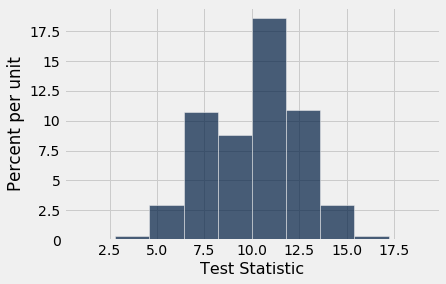

In [40]:
Table().with_columns('Test Statistic',test_statistics_under_null).hist()

<div class="hide">\pagebreak</div>

**Question 7.** Compute an empirical P-value for this test.

*Hint:* Which values of our test statistic are in the direction of the alternative hypothesis?

<!--
BEGIN QUESTION
name: q1_7
manual: false
-->

In [41]:
p_value = np.count_nonzero(test_statistics_under_null >= 13)/10000
p_value

0.1295

In [42]:
ok.grade("q1_7");

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



**Question 8.** Suppose you use a P-value cutoff of 1%. What do you conclude from the hypothesis test? Why?

<!--
BEGIN QUESTION
name: q1_8
manual: true
-->
<!-- EXPORT TO PDF -->
<!-- EXPORT TO PDF -->

Since the p-value is 13.2% which is far more than 1%, I would conclude that the result is statistical insignificant and we fail to reject the Null Hypothesis and would conclude that the coin is fair. This means taht there is high chance that the man could've won 13/20 times due to chance according to our simulation.

**Question 9.** Is `p_value` the probability that the customer cheated, or the probability that the customer didn't cheat, or neither? If neither, what is it?

<!--
BEGIN QUESTION
name: q1_9
manual: true
-->
<!-- EXPORT TO PDF -->
<!-- EXPORT TO PDF -->

The p-value gives the percentage and if this percentage is greater than our cut-off, we say that we fail to reject our null hypothesis. The p-value, hence is neither the probability that the customer cheated, or didn't cheat, but the probability under the null hypothes is that we see a value for our test statistic that is at least as extreme as the observed test statistic or more in the direction of the alternative.

**Question 10.** Is 1% (the P-value cutoff) the probability that the customer cheated, or the probability that the customer didn't cheat, or neither? If neither, what is it?

<!--
BEGIN QUESTION
name: q1_10
manual: true
-->
<!-- EXPORT TO PDF -->
<!-- EXPORT TO PDF -->

Neither because the cut off gives a probabilty that if measured against the p-value tells if the result is statistically significant or not. If the p-value is less than the cut-off then the result is statistically significant.

**Question 11.** Suppose you run this test for 400 different customers after observing each customer play 20 games.  When you reject the null hypothesis for a customer, you accuse that customer of cheating.  If no customers were actually cheating, can we compute how many we will incorrectly accuse of cheating? If so, what is the number? Explain your answer. Assume a 1% P-value cutoff.

<!--
BEGIN QUESTION
name: q1_11
manual: true
-->
<!-- EXPORT TO PDF -->
<!-- EXPORT TO PDF -->

Assuming a 1% p-value cut-off we will wrongly accuse 4 (4/100) of the people of wrongly cheating.

## 2. Landing a Spacecraft


(Note: This problem describes something that's close to [a real story with a very exciting video](http://www.space.com/29119-spacex-reusable-rocket-landing-crash-video.html), but the details have been changed somewhat.)

SpaceY, a company that builds and tests spacecraft, is testing a new reusable launch system.  Most spacecraft use a "first stage" rocket that propels a smaller payload craft away from Earth, then falls back to the ground and crashes.  SpaceY's new system is designed to land safely at a landing pad at a certain location, ready for later reuse.  If it doesn't land in the right location, it crashes, and the very, very expensive vehicle is destroyed.

SpaceY has tested this system over 1000 times.  Ordinarily, the vehicle doesn't land exactly on the landing pad.  For example, a gust of wind might move it by a few meters just before it lands.  It's reasonable to think of these small errors as random.  That is, the landing locations are drawn from some distribution over locations on the surface of Earth, centered around the landing pad.

Run the next cell to see a plot of those locations.

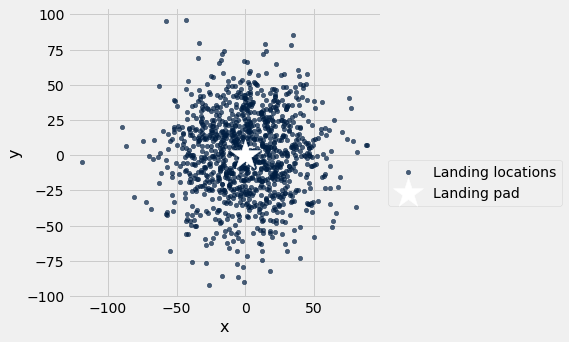

In [43]:
ordinary_landing_spots = Table.read_table("ordinary_landing_spots.csv")
ordinary_landing_spots.scatter("x", label="Landing locations")
plt.scatter(0, 0, c="w", s=1000, marker="*", label="Landing pad")
plt.legend(scatterpoints=1, bbox_to_anchor=(1.6, .5));

In [44]:
ordinary_landing_spots

x,y
-6.7829,-1.87505
4.18479,-36.8061
14.3525,24.3224
19.2845,-4.90241
-4.67293,5.66805
21.4823,-38.4391
4.2926,34.9504
-1.69233,-7.20196
-9.30243,9.04687
-26.5418,12.9869


During one test, the vehicle lands far away from the landing pad and crashes.  SpaceY investigators suspect there was a problem unique to this landing, a problem that wasn't part of the ordinary pattern of variation in landing locations.  They think a software error in the guidance system caused the craft to incorrectly attempt to land at a spot other than the landing pad.  The guidance system engineers think there was nothing out of the ordinary in this landing, and that there was no special problem with the guidance system.

Run the cell below to see a plot of the 1100 ordinary landings and the crash.

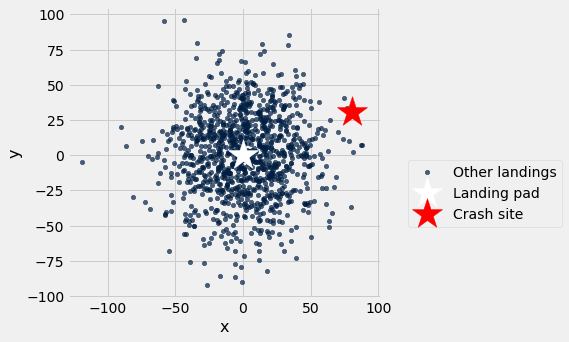

In [45]:
landing_spot = make_array(80.59, 30.91)
ordinary_landing_spots.scatter("x", label="Other landings")
plt.scatter(0, 0, c="w", s=1000, marker="*", label="Landing pad")
plt.scatter(landing_spot.item(0), landing_spot.item(1), marker="*", c="r", s=1000, label="Crash site")
plt.legend(scatterpoints=1, bbox_to_anchor=(1.6, .5));

**Question 1.** Write a function called `landing_distance`.  It should take two arguments: an "x" location and a "y" location (both numbers), and should return the euclidean distance from the landing spot to the origin!

<!--
BEGIN QUESTION
name: q2_1
manual: false
-->

In [46]:
def landing_distance(x_coordinate, y_coordinate):
    return (x_coordinate**2 + y_coordinate**2)**0.5

In [47]:
ok.grade("q2_1");

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 2
    Failed: 0
[ooooooooook] 100.0% passed



**Question 2.** Use the `landing_distance` function you wrote above to compute the landing distance for the crash site. Assign this distance to `observed_test_stat`.


<!--
BEGIN QUESTION
name: q2_2
manual: false
-->

In [48]:
observed_test_stat = landing_distance(80.59,30.91)
observed_test_stat

86.31440320131978

In [49]:
ok.grade("q2_2");

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



**Question 3.** Next, assign `distances` to an array containing the computed landing distances for each landing in `ordinary_landing_spots`. Use the `landing_distance` function you wrote above to compute these distances!

<!--
BEGIN QUESTION
name: q2_3
manual: false
-->

In [50]:
x = ordinary_landing_spots.column(0)
y = ordinary_landing_spots.column(1)
distances = landing_distance(x,y)
distances

array([ 7.0373003 , 37.04323884, 28.24132651, ..., 20.84023432,
       32.48926398, 23.88691421])

In [51]:
ok.grade("q2_3");

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



Run the next cell below to see the points color-coded by distance! Gold points correspond to landing locations that are as far or farther away than the Crash Site!

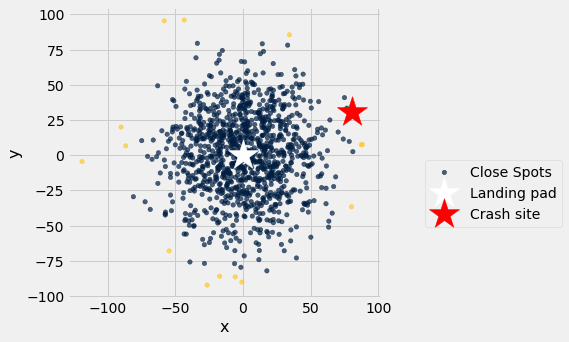

In [52]:
spots_with_distances = ordinary_landing_spots.with_column("Distances", distances >= observed_test_stat)
spots_with_distances.scatter('x', 'y', colors = 'Distances', label='Close Spots')
plt.scatter(0, 0, c="w", s=1000, marker="*", label="Landing pad")
plt.scatter(landing_spot.item(0), landing_spot.item(1), marker="*", c="r", s=1000, label="Crash site")
plt.legend(scatterpoints=1, bbox_to_anchor=(1.6, .5));

**Question 4.** What proportion of points were as far or farther away than the specific landing? Assign this value to `proportion_of_points` below. 

<!--
BEGIN QUESTION
name: q2_4
manual: false
-->

In [53]:
proportion_of_points = spots_with_distances.group('Distances').column(1).item(1)/spots_with_distances.num_rows
proportion_of_points

0.012727272727272728

In [54]:
ok.grade("q2_4");

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



## 3. Testing Dice


Students in a data science class want to figure out whether a six-sided die is fair or not. On a fair die, each face of the die appears with chance 1/6 on each roll, regardless of the results of other rolls.  Otherwise, a die is called unfair.  We can describe a die by the probability of landing on each face.  This table describes an example of a die that is unfairly weighted toward 1:

|Face|Probability|
|-|-|
|1|.5|
|2|.1|
|3|.1|
|4|.1|
|5|.1|
|6|.1|

**Question 1.** Define a null hypothesis and an alternative hypothesis to test whether a six-sided die is fair or not. 

*Hint:* Remember that an unfair die is one for which each face does not have an equal chance of appearing.

<!--
BEGIN QUESTION
name: q3_1
manual: true
-->
<!-- EXPORT TO PDF -->

Null Hypothesis: The die is fair 

Alternative Hypothesis: The die is unfair

We decide to test the die by rolling it 5 times. The proportions of the 6 faces in these 5 rolls are stored in a table with 6 rows.  For example, here is the table we'd make if the die rolls ended up being 1, 2, 3, 3, and 5:

|Face|Proportion|
|-|-|
|1|.2|
|2|.2|
|3|.4|
|4|.0|
|5|.2|
|6|.0|

The function `mystery_test_statistic`, defined below, takes a single table like this as its argument and returns a number (which we will use as a test statistic).

In [55]:
# Note: We've intentionally used unhelpful function and
# variable names to avoid giving away answers.  It's rarely
# a good idea to use names like "x" in your code.

def mystery_test_statistic(sample):
    x = np.ones(1) * (1/6)
    y = (sample.column('Proportion') - x)
    return np.mean(y**2)

**Question 2.** Describe in English what the test statistic is.  Is it equivalent to the total variation distance between the observed face distribution and the fair die distribution?
<!--
BEGIN QUESTION
name: q3_2
manual: true
-->
<!-- EXPORT TO PDF -->

No, it is not TVD. It finds the mean of the sqaured distance between the proportion of a sample and the expected value, which in this case is 1/6.

The function `simulate_observations_and_test` takes as its argument a table describing the probability distribution of a die.  It simulates one set of 5 rolls of that die, then tests the null hypothesis about that die using our test statistic function above.  It returns `False` if it *rejects* the null hypothesis about the die, and `True` otherwise.

In [58]:
# The probability distribution table for a fair die:
fair_die = Table().with_columns(
        "Face", np.arange(1, 6+1),
        "Probability", [1/6, 1/6, 1/6, 1/6, 1/6, 1/6])

def simulate_observations_and_test(actual_die):
    """Simulates die rolls from actual_die and tests the hypothesis that the die is fair.
    
    Returns False if that hypothesis is rejected, and True otherwise.
    
    """
    
    sample_size = 5
    p_value_cutoff = .2
    num_simulations = 250
    
    # Compute the observed value of the test statistic.
    observation_set = sample_proportions(sample_size, actual_die.column("Probability"))
    observation_props_table = Table().with_columns('Face', actual_die.column('Face'), 'Proportion', observation_set)
    observed_statistic = mystery_test_statistic(observation_props_table)
    
    # Simulate the test statistic repeatedly to get an 
    # approximation to the probability distribution of 
    # the test statistic, as predicted by the model in 
    # the null hypothesis. Store the simulated values 
    # of the test statistic in an array.
    simulated_statistics = make_array()
    for _ in np.arange(num_simulations):
        one_observation_set_under_null = sample_proportions(sample_size, fair_die.column("Probability"))
        simulated_props_table = Table().with_columns('Face', fair_die.column('Face'), 'Proportion', one_observation_set_under_null)
        simulated_statistic = mystery_test_statistic(simulated_props_table)
        simulated_statistics = np.append(simulated_statistics, simulated_statistic)
        
    # Compute the P-value
    p_value = np.count_nonzero(simulated_statistics >= observed_statistic) / num_simulations
    
    # If the P-value is below the cutoff, reject the 
    # null hypothesis and return False. Otherwise, 
    # return True.
    return p_value >= p_value_cutoff

# Calling the function to simulate a test of a fair die:
simulate_observations_and_test(fair_die)

True

**Question 3.** Use your knowledge of hypothesis tests and interpretation of the code above to determine the probability that `simulate_observations_and_test` returns `False` when its argument is `fair_die` (which is defined above the function). In other words, what is the chance that we reject the null hypothesis if the die is actually fair?

You can call the function a few times to see what it does, but **don't** perform a simulation to determine this probability.  Use your knowledge of hypothesis tests. You shouldn't have to write any code to answer this question.

<!--
BEGIN QUESTION
name: q3_3
manual: false
points: 1
-->

In [59]:
probability_of_false = .2

In [60]:
ok.grade("q3_3");

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



**Question 4.** Justify your probability from Question 3.
<!--
BEGIN QUESTION
name: q3_4
manual: true
-->
<!-- EXPORT TO PDF -->

The chance we reject the null hypothesis is given by the p-value cutoff. This is because the cutoff determines if we are going to reject the null hypothesis or not. So the bugger the cutoff is the higher is the chance of the p-value being in within this range and thus, higher the chance for us to reject the null hypothesis.

**Question 5.** Simulate the process of running `simulate_observations_and_test` 300 times. Assign `test_results` to an array that stores the result of each of these trials.

**Note:** This will be a little slow. 300 repetitions of the simulation should require a minute or so of computation, and should suffice to get an answer that's roughly correct.

<!--
BEGIN QUESTION
name: q3_5
manual: false
points: 1
-->

In [61]:
num_test_simulations = 300
test_results = make_array()
for i in np.arange(num_test_simulations):
    test_results = np.append(test_results,simulate_observations_and_test(fair_die))
    
# Don't change the following line.
test_results.astype(bool)

array([ True,  True,  True,  True, False,  True,  True, False, False,
        True,  True, False, False,  True,  True,  True,  True,  True,
       False,  True, False,  True,  True, False,  True,  True, False,
        True, False,  True,  True,  True,  True,  True,  True,  True,
        True, False,  True,  True,  True,  True,  True,  True, False,
       False,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True, False,  True,  True,  True,  True,  True,  True,
        True, False,  True,  True,  True,  True, False,  True,  True,
        True, False,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True, False,
        True,  True,  True,  True, False,  True,  True,  True, False,
        True,  True,  True,  True,  True,  True,  True, False,  True,
        True,  True,  True,  True,  True,  True, False,  True,  True,
        True,  True,  True,  True,  True,  True, False,  True, False,
        True,  True,

In [62]:
ok.grade("q3_5");

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



**Question 6.** Verify your answer to Question 3 by computing an approximate probability that `simulation_observations_and_test` returns `False`.
<!--
BEGIN QUESTION
name: q3_6
manual: false
-->

In [63]:
approximate_probability_of_false = (num_test_simulations - np.count_nonzero(test_results.astype(bool)))/num_test_simulations
approximate_probability_of_false

0.16333333333333333

In [64]:
ok.grade("q3_6");

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



**Question 7.** From the perspective of someone who wants to know the truth about the die, is it good or bad for the function to return `False` when its argument is `fair_die`? Why is it good or bad?
<!--
BEGIN QUESTION
name: q3_7
manual: true
-->
<!-- EXPORT TO PDF -->

It is bad for the function to return False. Since we are dealing with a fair die, one would expect all the values to be true that is, there shouldn't be any case where the null hypothesis is wrong. However, since we are dealing with a simulation and are dealing with randomness and chance, there would be cases wherein we get a False value, which corresponds to being against the fairness of a die.

## Mid-Semester Survey


Once you have submitted, please also take the time to complete the Mid-Semester Survey! We really appreciate your honest feedback and it helps us improve the course!

The Mid Semester survey is here: https://goo.gl/forms/1eFWxCkVtPq4madO2

## 5. Submission


Once you're finished, select "Save and Checkpoint" in the File menu and then execute the `submit` cell below. The result will contain a link that you can use to check that your assignment has been submitted successfully. If you submit more than once before the deadline, we will only grade your final submission. If you mistakenly submit the wrong one, you can head to [okpy.org](https://okpy.org/) and flag the correct version. To do so, go to the website, click on this assignment, and find the version you would like to have graded. There should be an option to flag that submission for grading!

In [29]:
_ = ok.submit()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Saving notebook... Could not save your notebook. Make sure your notebook is saved before sending it to OK!
Submit... 0.0% complete
Could not submit: Late Submission of cal/data8/sp19/hw07



In [30]:
# For your convenience, you can run this cell to run all the tests at once!
import os
print("Running all tests...")
_ = [ok.grade(q[:-3]) for q in os.listdir("tests") if q.startswith('q') and len(q) <= 10]
print("Finished running all tests.")

Running all tests...
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Question 3_3 > Suite 1 > Case 1

>>> 0 <= probability_of_false <= 1
NameError: name 'probability_of_false' is not defined

# Error: expected
#     True
# but got
#     Traceback (most recent call last):
#       ...
#     NameError: name 'probability_of_false' is not defined

Run only this test case with "python3 ok -q q3_3 --suite 1 --case 1"
---------------------------------------------------------------------
Test summary
    Passed: 0
    Failed: 1
[k..........] 0.0% passed

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

-------------------------------